In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.nn.functional import relu
from torch.utils.data import DataLoader
from torchvision import transforms
from torchsummary import summary
import warnings
warnings.filterwarnings('ignore')

In [2]:
from datasets import load_dataset
ds = load_dataset("huggan/wikiart", split="train")

README.md:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

dataset_infos.json:   0%|          | 0.00/5.91k [00:00<?, ?B/s]

train-00000-of-00072.parquet:   0%|          | 0.00/522M [00:00<?, ?B/s]

train-00001-of-00072.parquet:   0%|          | 0.00/518M [00:00<?, ?B/s]

train-00002-of-00072.parquet:   0%|          | 0.00/533M [00:00<?, ?B/s]

train-00003-of-00072.parquet:   0%|          | 0.00/533M [00:00<?, ?B/s]

train-00004-of-00072.parquet:   0%|          | 0.00/532M [00:00<?, ?B/s]

train-00005-of-00072.parquet:   0%|          | 0.00/519M [00:00<?, ?B/s]

train-00006-of-00072.parquet:   0%|          | 0.00/523M [00:00<?, ?B/s]

train-00007-of-00072.parquet:   0%|          | 0.00/532M [00:00<?, ?B/s]

train-00008-of-00072.parquet:   0%|          | 0.00/532M [00:00<?, ?B/s]

train-00009-of-00072.parquet:   0%|          | 0.00/531M [00:00<?, ?B/s]

train-00010-of-00072.parquet:   0%|          | 0.00/530M [00:00<?, ?B/s]

train-00011-of-00072.parquet:   0%|          | 0.00/539M [00:00<?, ?B/s]

train-00012-of-00072.parquet:   0%|          | 0.00/523M [00:00<?, ?B/s]

train-00013-of-00072.parquet:   0%|          | 0.00/555M [00:00<?, ?B/s]

train-00014-of-00072.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00015-of-00072.parquet:   0%|          | 0.00/563M [00:00<?, ?B/s]

train-00016-of-00072.parquet:   0%|          | 0.00/510M [00:00<?, ?B/s]

train-00017-of-00072.parquet:   0%|          | 0.00/459M [00:00<?, ?B/s]

train-00018-of-00072.parquet:   0%|          | 0.00/457M [00:00<?, ?B/s]

train-00019-of-00072.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00020-of-00072.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

train-00021-of-00072.parquet:   0%|          | 0.00/456M [00:00<?, ?B/s]

train-00022-of-00072.parquet:   0%|          | 0.00/448M [00:00<?, ?B/s]

train-00023-of-00072.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00024-of-00072.parquet:   0%|          | 0.00/444M [00:00<?, ?B/s]

train-00025-of-00072.parquet:   0%|          | 0.00/448M [00:00<?, ?B/s]

train-00026-of-00072.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00027-of-00072.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

train-00028-of-00072.parquet:   0%|          | 0.00/442M [00:00<?, ?B/s]

train-00029-of-00072.parquet:   0%|          | 0.00/449M [00:00<?, ?B/s]

train-00030-of-00072.parquet:   0%|          | 0.00/452M [00:00<?, ?B/s]

train-00031-of-00072.parquet:   0%|          | 0.00/450M [00:00<?, ?B/s]

train-00032-of-00072.parquet:   0%|          | 0.00/460M [00:00<?, ?B/s]

train-00033-of-00072.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

train-00034-of-00072.parquet:   0%|          | 0.00/466M [00:00<?, ?B/s]

train-00035-of-00072.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

train-00036-of-00072.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

train-00037-of-00072.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00038-of-00072.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

train-00039-of-00072.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

train-00040-of-00072.parquet:   0%|          | 0.00/440M [00:00<?, ?B/s]

train-00041-of-00072.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

train-00042-of-00072.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

train-00043-of-00072.parquet:   0%|          | 0.00/473M [00:00<?, ?B/s]

train-00044-of-00072.parquet:   0%|          | 0.00/451M [00:00<?, ?B/s]

train-00045-of-00072.parquet:   0%|          | 0.00/452M [00:00<?, ?B/s]

train-00046-of-00072.parquet:   0%|          | 0.00/458M [00:00<?, ?B/s]

train-00047-of-00072.parquet:   0%|          | 0.00/481M [00:00<?, ?B/s]

train-00048-of-00072.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00049-of-00072.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

train-00050-of-00072.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

train-00051-of-00072.parquet:   0%|          | 0.00/515M [00:00<?, ?B/s]

train-00052-of-00072.parquet:   0%|          | 0.00/514M [00:00<?, ?B/s]

train-00053-of-00072.parquet:   0%|          | 0.00/509M [00:00<?, ?B/s]

train-00054-of-00072.parquet:   0%|          | 0.00/462M [00:00<?, ?B/s]

train-00055-of-00072.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00056-of-00072.parquet:   0%|          | 0.00/414M [00:00<?, ?B/s]

train-00057-of-00072.parquet:   0%|          | 0.00/405M [00:00<?, ?B/s]

train-00058-of-00072.parquet:   0%|          | 0.00/359M [00:00<?, ?B/s]

train-00059-of-00072.parquet:   0%|          | 0.00/304M [00:00<?, ?B/s]

train-00060-of-00072.parquet:   0%|          | 0.00/449M [00:00<?, ?B/s]

train-00061-of-00072.parquet:   0%|          | 0.00/438M [00:00<?, ?B/s]

train-00062-of-00072.parquet:   0%|          | 0.00/447M [00:00<?, ?B/s]

train-00063-of-00072.parquet:   0%|          | 0.00/435M [00:00<?, ?B/s]

train-00064-of-00072.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

train-00065-of-00072.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

train-00066-of-00072.parquet:   0%|          | 0.00/448M [00:00<?, ?B/s]

train-00067-of-00072.parquet:   0%|          | 0.00/436M [00:00<?, ?B/s]

train-00068-of-00072.parquet:   0%|          | 0.00/474M [00:00<?, ?B/s]

train-00069-of-00072.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

train-00070-of-00072.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

train-00071-of-00072.parquet:   0%|          | 0.00/367M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/81444 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/45 [00:00<?, ?it/s]

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using gpu: %s ' % torch.cuda.is_available())

Using gpu: True 


In [4]:
class WikiArtDataset(torch.utils.data.Dataset):
    def __init__(self, ds, transform=None):
        self.ds = ds
        self.transform = transform

    def __len__(self):
        return len(self.ds)

    def __getitem__(self, idx):
        sample = self.ds[idx]
        image = sample['image']
        label = sample['style']

        if self.transform:
            image = self.transform(image)

        return image, label

In [5]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    #transforms.RandomHorizontalFlip(),  
    #transforms.RandomRotation(45),      
    #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

wikiart_dataset = WikiArtDataset(ds, transform=transform)
dataloader = DataLoader(wikiart_dataset, batch_size=128, shuffle=True, num_workers=0, pin_memory=False)
print(len(dataloader.dataset))

81444


In [6]:
class Generator(nn.Module):
    def __init__(self, input_dim):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256 * 4 * 4)
        self.bc1 = nn.BatchNorm2d(128)
        self.bc2 = nn.BatchNorm2d(128)
        self.bc3 = nn.BatchNorm2d(64)
        self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.convT1 = nn.ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=2, padding=1) 
        #self.convT2 = nn.ConvTranspose2d(128, 128, kernel_size=(4, 4), stride=2, padding=1)  
        self.convT3 = nn.ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=2, padding=1)
        self.convT4 = nn.ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=2, padding=1)
        
        
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = relu(self.fc1(x))
        
        x = x.view(-1, 256, 4, 4)
        
        x = relu(self.convT1(x))
        x = self.up(x)
        #x = self.bc1(x)
        #x = relu(self.convT2(x))
        #x = self.up(x)
        #x = self.bc2(x)
        x = relu(self.convT3(x))
        x = self.up(x)
        x = self.bc3(x)
        x = self.convT4(x)
    
        x = self.tanh(x)

        return x


generator = Generator(input_dim=100).to(device)
summary(generator, (100,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 4096]         413,696
   ConvTranspose2d-2            [-1, 128, 8, 8]         524,416
          Upsample-3          [-1, 128, 16, 16]               0
   ConvTranspose2d-4           [-1, 64, 32, 32]         131,136
          Upsample-5           [-1, 64, 64, 64]               0
       BatchNorm2d-6           [-1, 64, 64, 64]             128
   ConvTranspose2d-7          [-1, 3, 128, 128]           3,075
              Tanh-8          [-1, 3, 128, 128]               0
Total params: 1,072,451
Trainable params: 1,072,451
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 5.59
Params size (MB): 4.09
Estimated Total Size (MB): 9.69
----------------------------------------------------------------


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999434..0.9999747].


(-0.5, 127.5, 127.5, -0.5)

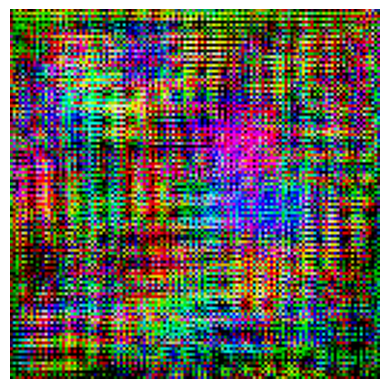

In [9]:
img = torch.rand(100).to(device) * 255
img = generator(img)[0]

img = img.detach().cpu().numpy()
plt.imshow(img.T)
plt.axis("off")

In [10]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=(4, 4), stride=2, padding=1)  
        self.conv2 = nn.Conv2d(64, 128, kernel_size=(4, 4), stride=2, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=(4, 4), stride=2, padding=1)
        self.fc1 = nn.Linear(256 * 16 * 16, 1)  
        self.lrelu = nn.LeakyReLU(0.2)
        self.dropout = nn.Dropout(0.3)
        self.bn1 = nn.BatchNorm2d(128)
        self.bn2 = nn.BatchNorm2d(256)
        self.sigmoid = nn.Sigmoid()  

    def forward(self, x):
        x = self.lrelu(self.conv1(x))
        x = self.dropout(x)  
        x = self.lrelu(self.bn1(self.conv2(x)))
        x = self.dropout(x)
        x = self.lrelu(self.conv3(x))
        x = x.view(x.size(0), -1)  
        x = self.fc1(x)
        return x

discriminator = Discriminator().to(device)
summary(discriminator, (3, 128, 128))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           3,136
         LeakyReLU-2           [-1, 64, 64, 64]               0
           Dropout-3           [-1, 64, 64, 64]               0
            Conv2d-4          [-1, 128, 32, 32]         131,200
       BatchNorm2d-5          [-1, 128, 32, 32]             256
         LeakyReLU-6          [-1, 128, 32, 32]               0
           Dropout-7          [-1, 128, 32, 32]               0
            Conv2d-8          [-1, 256, 16, 16]         524,544
         LeakyReLU-9          [-1, 256, 16, 16]               0
           Linear-10                    [-1, 1]          65,537
Total params: 724,673
Trainable params: 724,673
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 11.00
Params size (MB): 2.76
Estimated 

In [11]:
g_opt = torch.optim.Adam(lr=1e-4, betas=(0.5, 0.999), params=generator.parameters())
d_opt = torch.optim.Adam(lr=1e-4, betas=(0.5, 0.999), params=discriminator.parameters())

In [12]:
nb_epochs = 100
batch_size = 128

In [13]:
criterion = nn.BCEWithLogitsLoss()

In [14]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        nn.init.constant_(m.bias.data, 0)


In [15]:
generator.apply(weights_init)
discriminator.apply(weights_init)

Discriminator(
  (conv1): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (fc1): Linear(in_features=65536, out_features=1, bias=True)
  (lrelu): LeakyReLU(negative_slope=0.2)
  (dropout): Dropout(p=0.3, inplace=False)
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sigmoid): Sigmoid()
)

In [16]:
import os
import torchvision.utils as vutils
os.makedirs('generated_images128', exist_ok=True)

In [17]:
def train(train_loader, nb_epochs, batch_size, generator, discriminator, input_dim, device):
    for epoch in (range(nb_epochs)):
        total_d_loss = 0.0
        total_g_loss = 0.0

        for batch_idx, (real_images, _) in enumerate(train_loader):
            real_images = real_images.to(device)
            m = real_images.size(0)
            # Train Discriminator
            d_opt.zero_grad()
            real_labels = torch.ones(m).to(device)
            fake_labels = torch.zeros(m).to(device)
            
            outputs_real = discriminator(real_images).view(-1)
            d_loss_real = criterion(outputs_real, real_labels)

            noise = torch.randn(m, input_dim, device=device)
            fake_images = generator(noise)
            outputs_fake = discriminator(fake_images.detach()).view(-1)
            d_loss_fake = criterion(outputs_fake, fake_labels)

            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            d_opt.step()
            total_d_loss += d_loss.item()

            # Entraînement du générateur
            g_opt.zero_grad()
            g_labels = torch.ones(m, device=device)
            outputs = discriminator(fake_images).view(-1)
            g_loss = criterion(outputs, g_labels)
            g_loss.backward()
            g_opt.step()
            total_g_loss += g_loss.item()

        avg_d_loss = total_d_loss / len(train_loader)
        avg_g_loss = total_g_loss / len(train_loader)

        g_loss_h.append(avg_g_loss)
        d_loss_h.append(avg_d_loss)
        print(f"Epoch [{epoch+1}/{nb_epochs}], Discriminator Loss: {avg_d_loss:.4f}, Generator Loss: {avg_g_loss:.4f}")

        with torch.no_grad():
            noise = torch.randn(6, input_dim, device=device)  
            generated_images = generator(noise)
            generated_images = (generated_images + 1) / 2 

            # Sauvegarder les images générées en les empilant
            vutils.save_image(generated_images, f"generated_images128/epoch_{epoch+1}.png", nrow=3, normalize=True)

            # Si tu veux afficher les images dans le notebook
            grid_img = vutils.make_grid(generated_images.cpu(), nrow=3)
            plt.imshow(grid_img.permute(1, 2, 0))
            plt.axis("off")
            plt.show()

Epoch [1/100], Discriminator Loss: 0.5482, Generator Loss: 2.8154


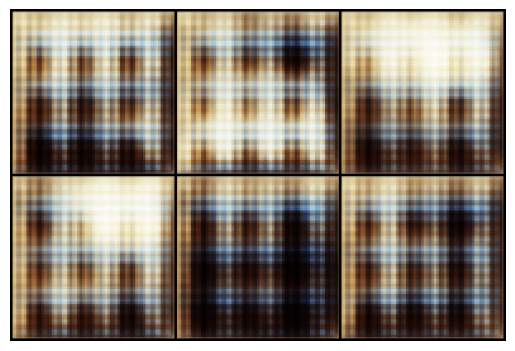

Epoch [2/100], Discriminator Loss: 0.7229, Generator Loss: 2.0853


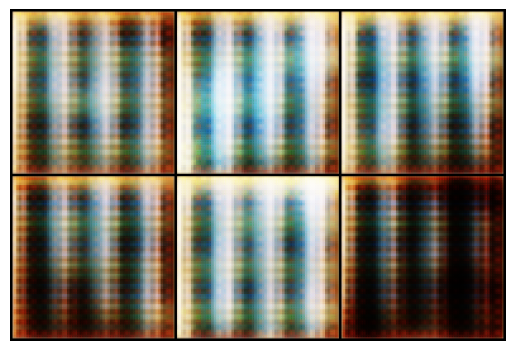

Epoch [3/100], Discriminator Loss: 0.4433, Generator Loss: 2.8287


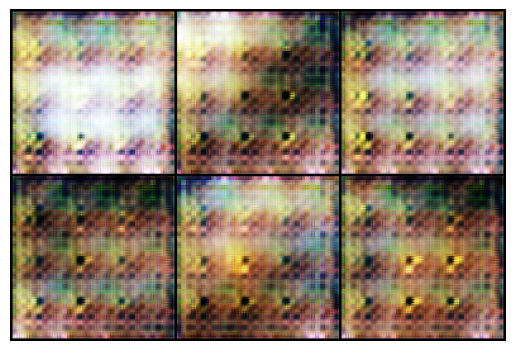

Epoch [4/100], Discriminator Loss: 0.1681, Generator Loss: 3.7444


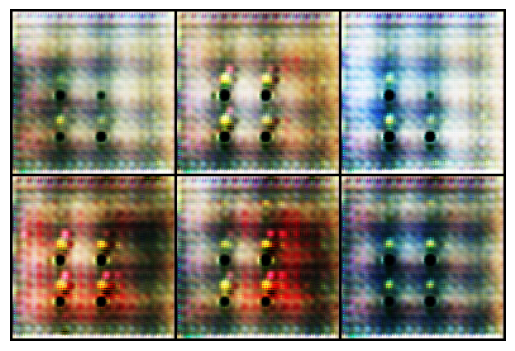

Epoch [5/100], Discriminator Loss: 0.0675, Generator Loss: 4.9627


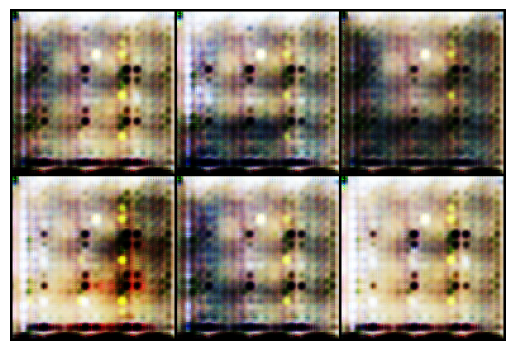

Epoch [6/100], Discriminator Loss: 0.0560, Generator Loss: 5.6731


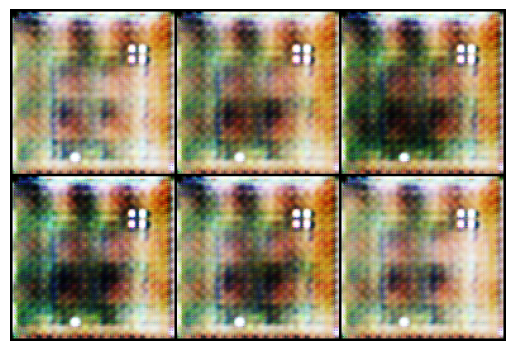

In [ ]:
g_loss_h= []
d_loss_h = []
train(dataloader, nb_epochs, batch_size, generator, discriminator, 100, device)

In [ ]:
torch.save(generator.state_dict(), 'generator_best.pth')

In [ ]:
img = torch.randn(1, 100).to(device)
generated_img = generator(img)
img_scaled = (generated_img + 1) / 2
img_final = img_scaled * 255
img_np = img_final.detach().cpu().squeeze().numpy().transpose(1, 2, 0)

plt.imshow(img_np.astype('uint8'))
plt.axis("off")
plt.show()


In [ ]:
plt.plot(g_loss_h, c="red", label="g_loss")
plt.plot(d_loss_h, c="blue", label="d_loss")
plt.title("PaintGAN training curves")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")